In [105]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os
import numpy as np
import scipy.stats as stats
    


## Daily Data

<Axes: title={'center': 'Federal Funds Effective Rate'}, xlabel='Date', ylabel='Interest Rate (%)'>

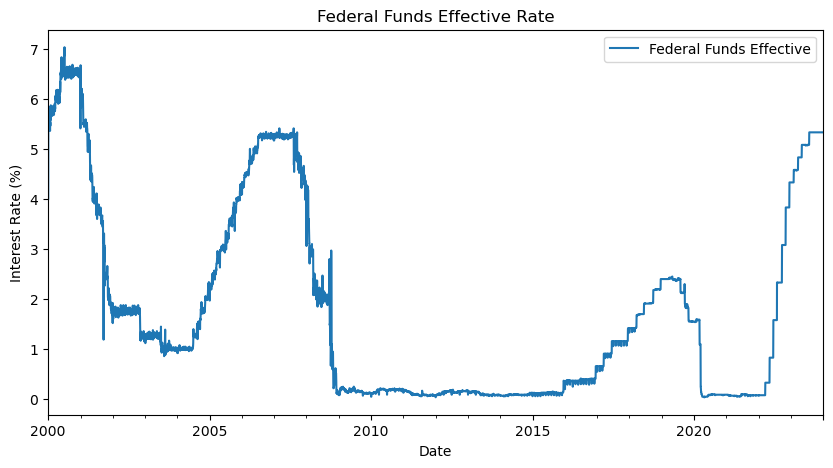

In [81]:
daily_df = pd.read_csv('resources/clean_data/daily/DFF.csv', index_col="DATE", parse_dates=True)
daily_df.rename(columns={'DFF': 'Federal Funds Effective'}, inplace=True)

daily_df.plot(xlabel="Date", ylabel="Interest Rate (%)", title="Federal Funds Effective Rate", figsize=(10, 5))

## Monthly Data

<Axes: title={'center': 'Federal Funds Effective Rate'}, xlabel='Date', ylabel='Interest Rate (%)'>

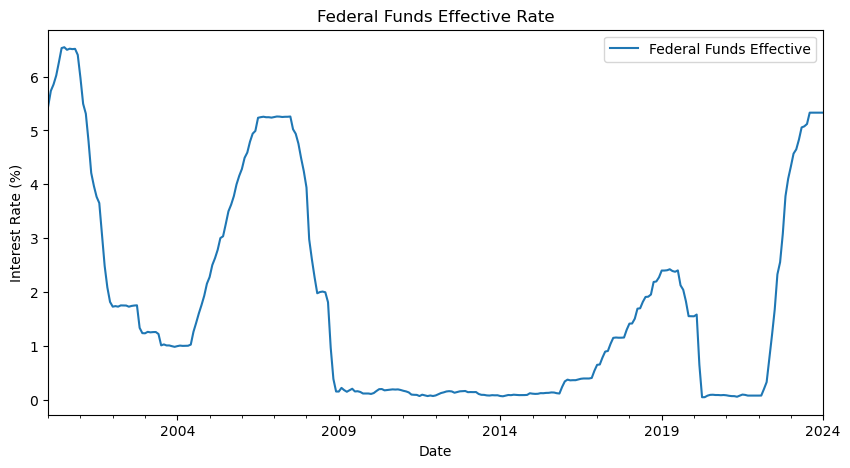

In [82]:
# Cast the daily data to monthly data
monthly_df = daily_df.resample('M').mean()
monthly_df.plot(xlabel="Date", ylabel="Interest Rate (%)", title="Federal Funds Effective Rate", figsize=(10, 5))

In [83]:
# shift index dates to first day of the month and reset index
monthly_df.index = monthly_df.index.to_period('M').to_timestamp()
monthly_df.reset_index(inplace=True)

# read in all monthly data files and merge them into the monthly_df
all_dfs = [pd.read_csv(f'resources/clean_data/monthly/{datafile}', parse_dates=['DATE']) for datafile in os.listdir('resources/clean_data/monthly') if datafile.endswith('.csv')]
_ = [monthly_df := monthly_df.merge(df, on='DATE', how='left') for df in all_dfs]

# Set the DATE column as the index of the monthly_df
monthly_df.set_index('DATE', inplace=True)

monthly_df.drop(columns=['MEDCPIM158SFRBCLE', 'FED Interest Rate'], inplace=True)

monthly_df.rename(columns={'UNRATE': 'Unemployment Rate'}, inplace=True)

# View the first few rows of the monthly_df
monthly_df.head()

,Federal Funds Effective,Federal Surplus/Deficit,Unemployment Rate,CPI (Inflation)
DATE,,,,
2000-01-01,5.448387,62152.0,4.0,3.85
2000-02-01,5.734828,-41734.0,4.1,2.79
2000-03-01,5.853548,-35380.0,4.0,3.42
2000-04-01,6.019667,159497.0,3.8,2.28
2000-05-01,6.268065,-3611.0,4.0,2.85


array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>], dtype=object)

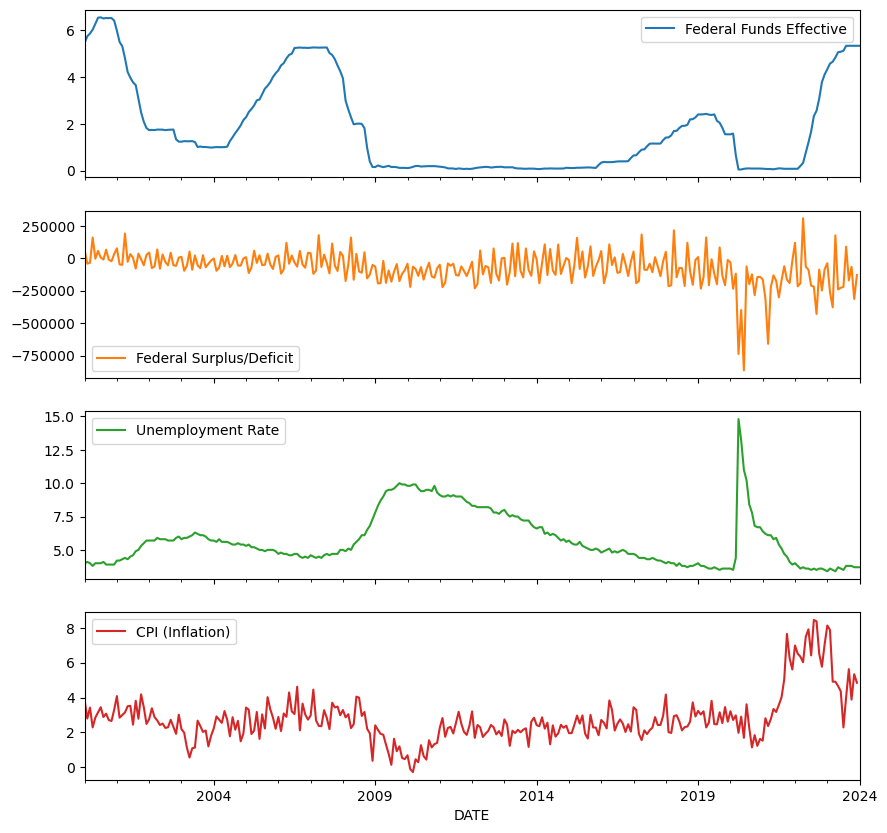

In [84]:
monthly_df.plot(subplots=True, figsize=(10, 10))

## Quarterly Data

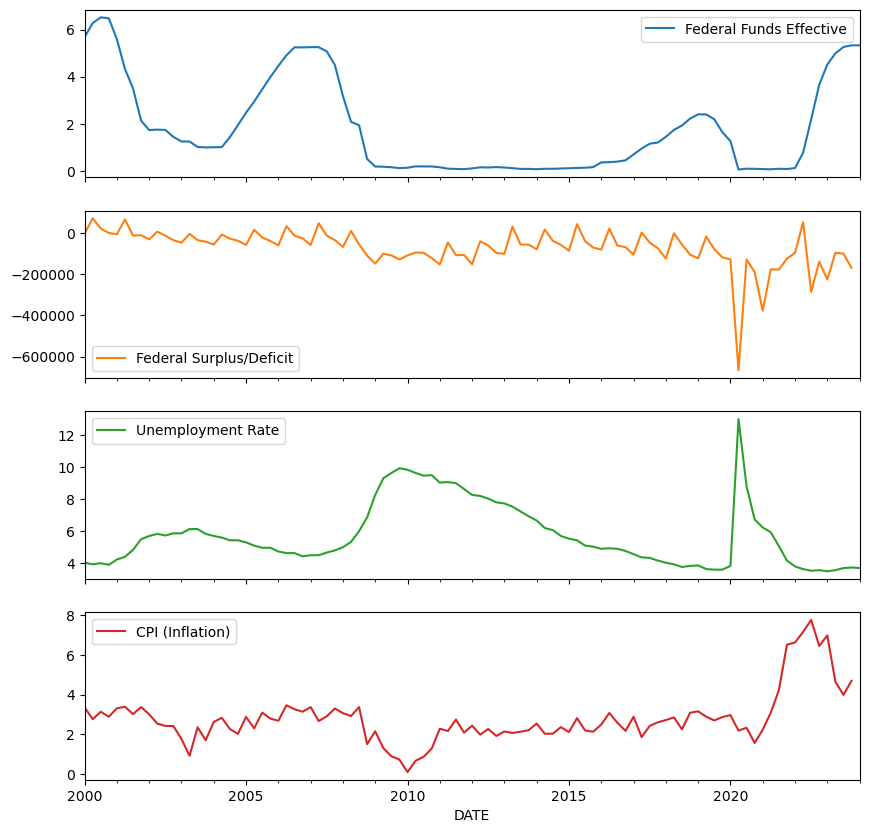

In [85]:
# Cast monthly_df to quarterly data
quarterly_df = monthly_df.resample('Q').mean()
quarterly_df.plot(subplots=True, figsize=(10, 10))

# setindex to first day of each quarter
quarterly_df.index = quarterly_df.index.to_period('Q').to_timestamp()

In [86]:
# read in all monthly data files and merge them into the quarterly_df
all_quarterly_dfs = [pd.read_csv(f'resources/clean_data/quarterly/{datafile}', parse_dates=['DATE']) for datafile in os.listdir('resources/clean_data/quarterly') if datafile.endswith('.csv')]
_ = [quarterly_df := quarterly_df.merge(df, on='DATE', how='left') for df in all_quarterly_dfs]

# Set the DATE column as the index of the quarterly_df
quarterly_df.set_index('DATE', inplace=True)

# View the first few rows of the quarterly_df
quarterly_df.head()

,Federal Funds Effective,Federal Surplus/Deficit,Unemployment Rate,CPI (Inflation),Foreign Direct Investment,Federal Tax Receipts,GDP by Billion
DATE,,,,,,,
2000-01-01,5.678921,-4987.333333,4.033333,3.353333,207400.0,1272.073,10002.179
2000-04-01,6.272022,70591.333333,3.933333,2.756667,365568.0,1284.187,10247.720
2000-07-01,6.519430,20127.000000,4.000000,3.130000,318888.0,1291.650,10318.165
2000-10-01,6.475315,-781.666667,3.900000,2.883333,389484.0,1306.215,10435.744
2001-01-01,5.593687,-7483.666667,4.233333,3.303333,236820.0,1301.000,10470.231


array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>], dtype=object)

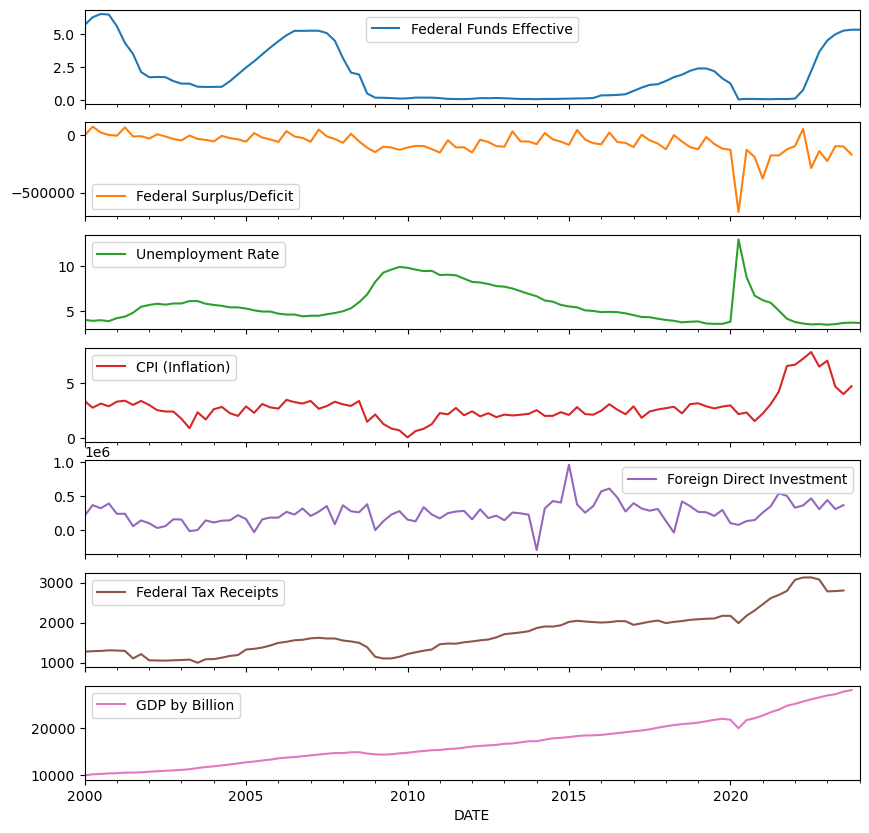

In [87]:
quarterly_df.plot(subplots=True, figsize=(10, 10))

## Yearly Data

,Federal Funds Effective,Federal Surplus/Deficit,Unemployment Rate,CPI (Inflation),Foreign Direct Investment,Federal Tax Receipts,GDP by Billion
DATE,,,,,,,
2000-01-01,6.236422,21237.333333,3.966667,3.030833,320335.0,1288.53125,10250.95200
2001-01-01,3.887125,7855.250000,4.741667,3.266667,168046.0,1226.82275,10581.92900
2002-01-01,1.667175,-19222.583333,5.783333,2.591667,85958.0,1053.18425,10929.10825
2003-01-01,1.127535,-33254.916667,5.991667,1.681667,69512.0,1053.86400,11456.44950
2004-01-01,1.348928,-33253.166667,5.541667,2.432500,151731.0,1140.59650,12217.19575


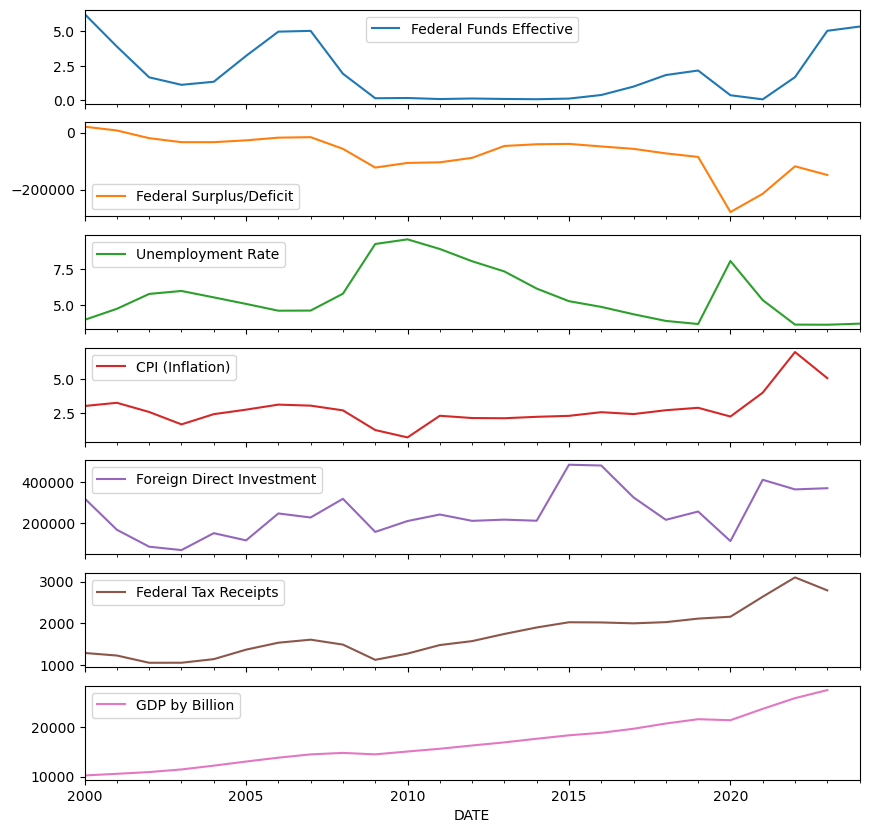

In [88]:
# cast quarterly_df to yearly data
annual_df = quarterly_df.resample('Y').mean()
annual_df.plot(subplots=True, figsize=(10, 10))

# setindex to first day of each year
annual_df.index = annual_df.index.to_period('Y').to_timestamp()

annual_df.head()

In [89]:
# read in all annual data files and merge them into the yearly_df
all_annual_df = [pd.read_csv(f'resources/clean_data/annual/{datafile}', parse_dates=['DATE']) for datafile in os.listdir('resources/clean_data/annual') if datafile.endswith('.csv')]
_ = [annual_df := annual_df.merge(df, on='DATE', how='left') for df in all_annual_df]

# Set the DATE column as the index of the quarterly_df
annual_df.set_index('DATE', inplace=True)

# View the first few rows of the quarterly_df
annual_df.head(30)

,Federal Funds Effective,Federal Surplus/Deficit,Unemployment Rate,CPI (Inflation),Foreign Direct Investment,Federal Tax Receipts,GDP by Billion,US Aggravated Assault Rate by 100k,US Burglary Rate by 100k,US Larceny Rate by 100k,US Motor Vehicle Theft Rate by 100k,US Property Crime Rate by 100k,US Violent Crime Rate by 100k,Anxiety,Depressive Disorder,Alcohol/Substance Use
DATE,,,,,,,,,,,,,,,,
2000-01-01,6.236422,21237.333333,3.966667,3.030833,320335.000000,1288.53125,10250.95200,324.0,728.8,2477.3,412.2,3618.3,506.5,NaN,NaN,NaN
2001-01-01,3.887125,7855.250000,4.741667,3.266667,168046.000000,1226.82275,10581.92900,318.6,741.8,2485.7,430.5,3658.1,504.5,NaN,NaN,NaN
2002-01-01,1.667175,-19222.583333,5.783333,2.591667,85958.000000,1053.18425,10929.10825,309.5,747.0,2450.7,432.9,3630.6,494.4,NaN,NaN,NaN
2003-01-01,1.127535,-33254.916667,5.991667,1.681667,69512.000000,1053.86400,11456.44950,295.4,741.0,2416.5,433.7,3591.2,475.8,NaN,NaN,NaN
2004-01-01,1.348928,-33253.166667,5.541667,2.432500,151731.000000,1140.59650,12217.19575,288.6,730.3,2362.3,421.5,3514.1,463.2,NaN,NaN,NaN
2005-01-01,3.212844,-26814.916667,5.083333,2.762500,116655.000000,1367.82325,13039.19700,290.8,726.9,2287.8,416.8,3431.5,469.0,NaN,NaN,NaN
2006-01-01,4.962731,-17434.916667,4.608333,3.132500,247326.000000,1534.77550,13815.58300,292.0,733.1,2213.2,400.2,3346.6,479.3,NaN,NaN,NaN
2007-01-01,5.018885,-15661.666667,4.616667,3.057500,227714.000000,1607.65675,14474.22700,287.2,726.1,2185.4,364.9,3276.4,471.8,NaN,NaN,NaN
2008-01-01,1.926586,-56705.750000,5.800000,2.710833,318450.000000,1489.51600,14769.86175,277.5,733.0,2166.1,315.4,3214.6,458.6,NaN,NaN,NaN


array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>], dtype=object)

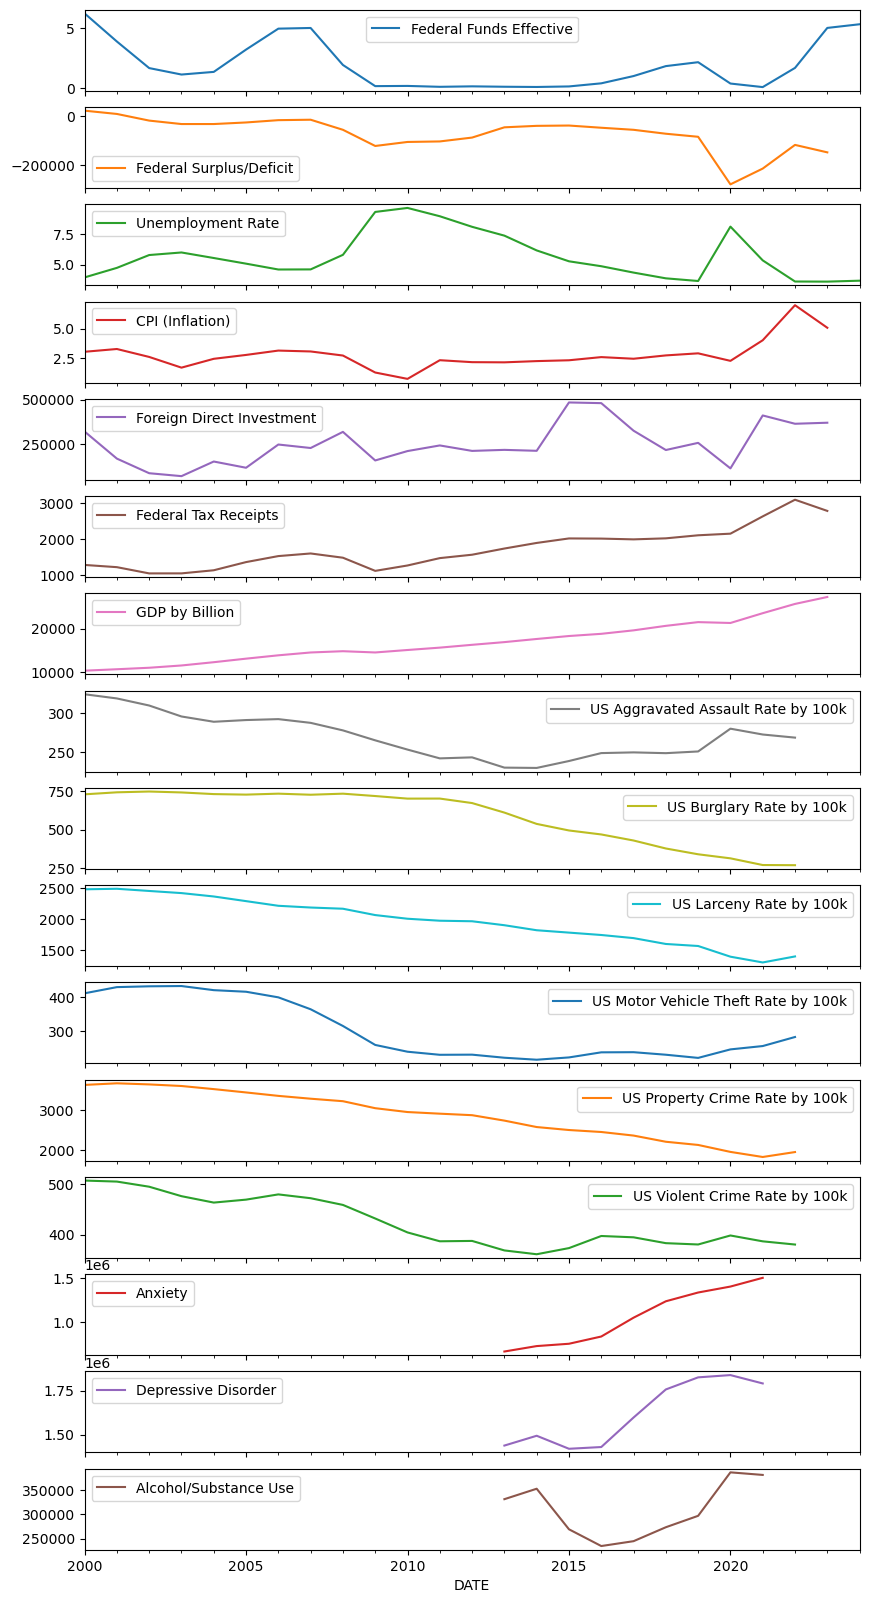

In [90]:
annual_df.plot(subplots=True, figsize=(10, 20))

# Correlations

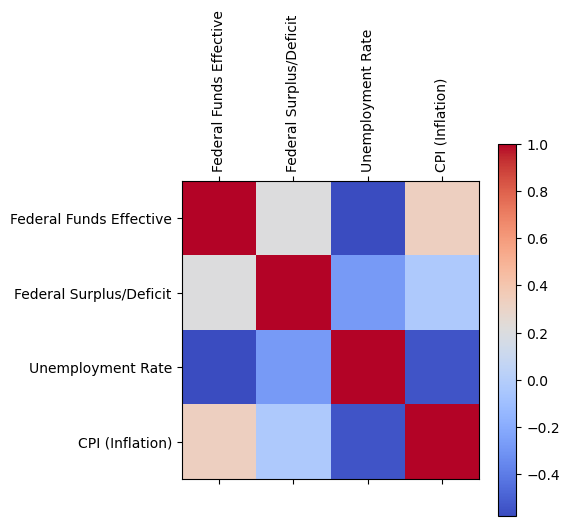

In [91]:
# Create a correlation matrix for all columns in monthly_df
correlation = monthly_df.corr()
correlation

# Create a heatmap from the correlation matrix
plt.matshow(correlation, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.show()



In [97]:
# Create a correlation matrix  for all columns in quarterly_df
correlation = quarterly_df.corr()
correlation



,Federal Funds Effective,Federal Surplus/Deficit,Unemployment Rate,CPI (Inflation),Foreign Direct Investment,Federal Tax Receipts,GDP by Billion
Federal Funds Effective,1.000000,0.296038,-0.585830,0.356593,0.002890,-0.093246,-0.183052
Federal Surplus/Deficit,0.296038,1.000000,-0.388092,-0.082996,-0.013297,-0.354454,-0.463405
Unemployment Rate,-0.585830,-0.388092,1.000000,-0.594118,-0.265321,-0.389043,-0.246433
CPI (Inflation),0.356593,-0.082996,-0.594118,1.000000,0.282364,0.665115,0.522189
Foreign Direct Investment,0.002890,-0.013297,-0.265321,0.282364,1.000000,0.458320,0.386838
Federal Tax Receipts,-0.093246,-0.354454,-0.389043,0.665115,0.458320,1.000000,0.951788
GDP by Billion,-0.183052,-0.463405,-0.246433,0.522189,0.386838,0.951788,1.000000


([<matplotlib.axis.YTick at 0x2d8e23310>,
 [Text(0, 0, 'Federal Funds Effective'),
  Text(0, 1, 'Federal Surplus/Deficit'),
  Text(0, 2, 'Unemployment Rate'),
  Text(0, 3, 'CPI (Inflation)'),
  Text(0, 4, 'Foreign Direct Investment'),
  Text(0, 5, 'Federal Tax Receipts'),
  Text(0, 6, 'GDP by Billion')])

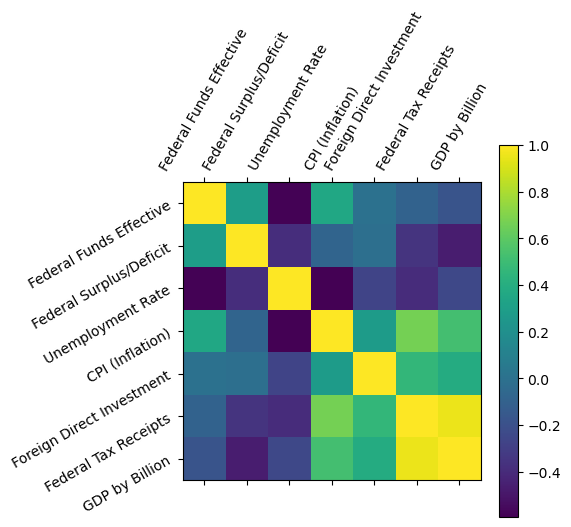

In [96]:

# Plot correlation heatmap  for all columns in monthly_df include a legend
plt.matshow(quarterly_df.corr())
plt.colorbar()
plt.xticks(range(len(quarterly_df.columns)), quarterly_df.columns, rotation=60)
plt.yticks(range(len(quarterly_df.columns)), quarterly_df.columns, rotation=30)


                                     Federal Funds Effective  \
Federal Funds Effective                             1.000000   
Federal Surplus/Deficit                             0.416536   
Unemployment Rate                                  -0.637724   
CPI (Inflation)                                     0.397438   
Foreign Direct Investment                           0.000108   
Federal Tax Receipts                               -0.062089   
GDP by Billion                                     -0.195113   
US Aggravated Assault Rate by 100k                  0.717559   
US Burglary Rate by 100k                            0.357101   
US Larceny Rate by 100k                             0.515395   
US Motor Vehicle Theft Rate by 100k                 0.678583   
US Property Crime Rate by 100k                      0.515394   
US Violent Crime Rate by 100k                       0.733357   
Anxiety                                             0.431664   
Depressive Disorder                     

<Figure size 2000x2000 with 0 Axes>

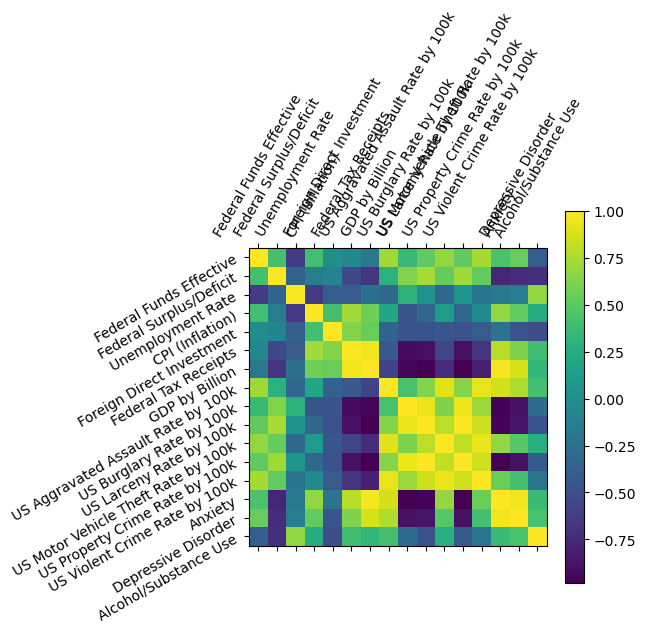

In [94]:
# Create a correlation matrix  for all columns in annual_df
correlation = annual_df.corr()
correlation

# Plot correlation heatmap for all columns in annual_df include a legend, make it a big plot

# Create a correlation matrix for all columns in annual_df
correlation = annual_df.corr()
print(correlation)

# Plot correlation heatmap for all columns in annual_df include a legend, make it a bigger plot
plt.figure(figsize=(20, 20))
plt.matshow(annual_df.corr())
plt.colorbar()
plt.xticks(range(len(annual_df.columns)), annual_df.columns, rotation=60)
plt.yticks(range(len(annual_df.columns)), annual_df.columns, rotation=30)
plt.show()


<Axes: >

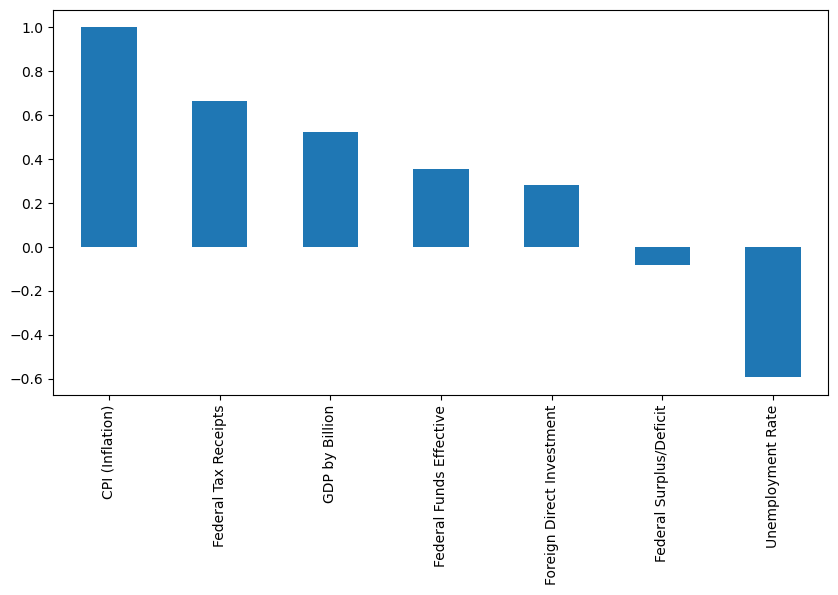

In [98]:
# show which columns are most correlated with the Inflation Rate
correlation['CPI (Inflation)'].sort_values(ascending=False)

# plot the correlation with the Inflation Rate as a bar chart
correlation['CPI (Inflation)'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))



<Axes: >

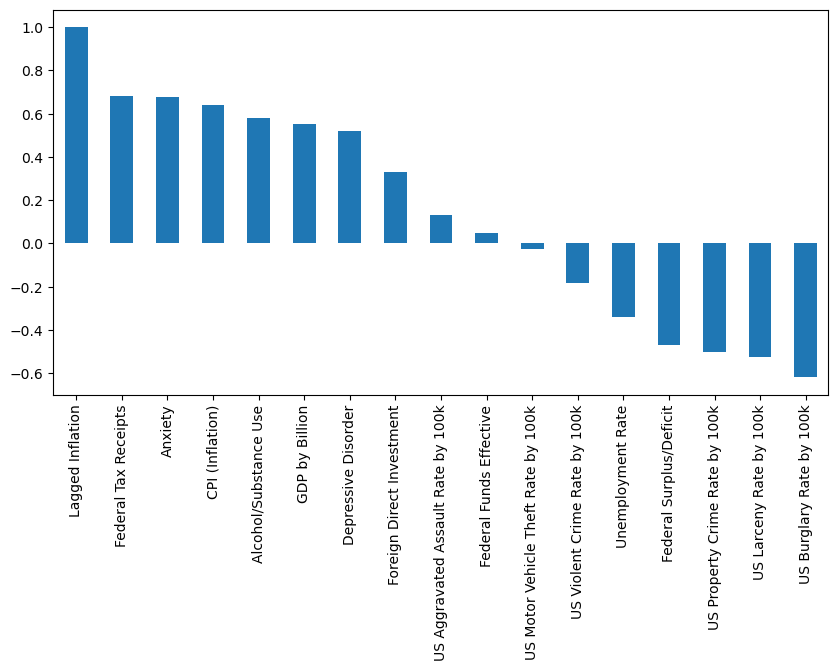

In [108]:
# create a lagged inflation column that tracks the inflation rate from the previous year
annual_df['Lagged Inflation'] = annual_df['CPI (Inflation)'].shift(-1)

# plot correlation of all columns with the lagged inflation column
correlation = annual_df.corr()
correlation['Lagged Inflation'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))

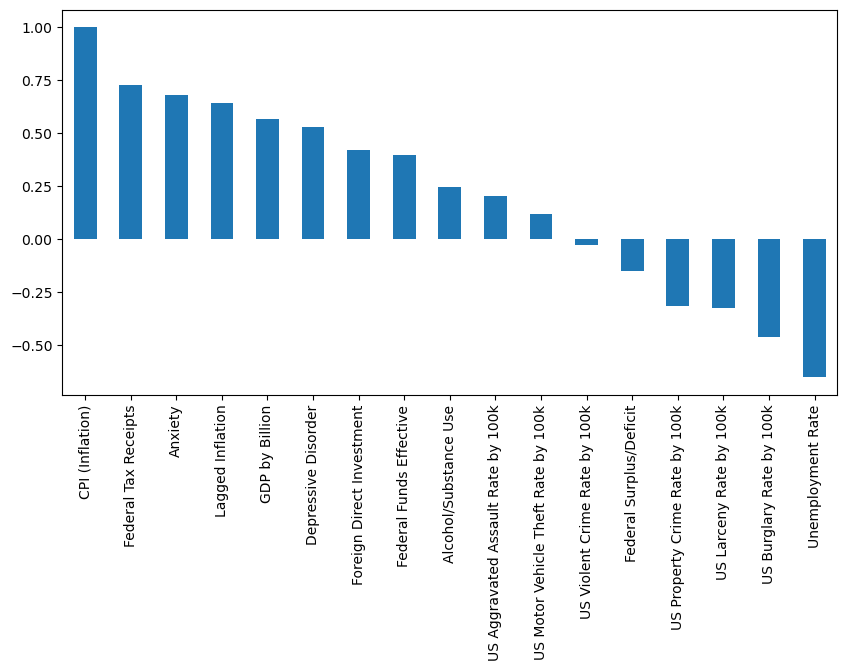

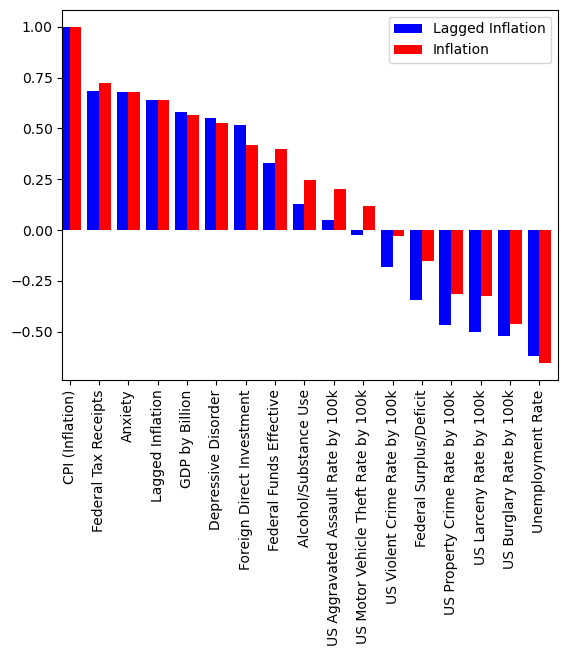

In [109]:


# compare the correlation with the lagged inflation column to the correlation with the inflation column
correlation['CPI (Inflation)'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))

# plot correlation with lagged inflation and inflation on the same plot
lag_cor = correlation['Lagged Inflation'].sort_values(ascending=False)
std_cor = correlation['CPI (Inflation)'].sort_values(ascending=False)

# plot lag_cor and std_cor on the same plot
fig, ax = plt.subplots()
lag_cor.plot(kind='bar', color='blue', ax=ax, position=1, width=0.4)
std_cor.plot(kind='bar', color='red', ax=ax, position=0, width=0.4)
ax.legend(['Lagged Inflation', 'Inflation'])
plt.show()





<Axes: >

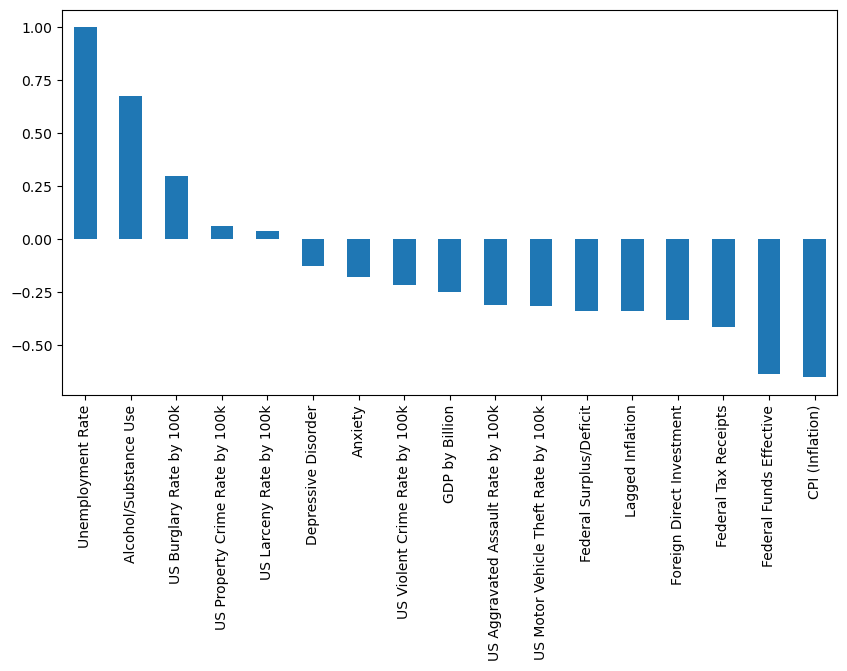

In [110]:
correlation['Unemployment Rate'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))